Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\dreyus95\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

H(x) =  [ 1  1  1  1 -1 -1 -1]
Accuracy score: 1.000


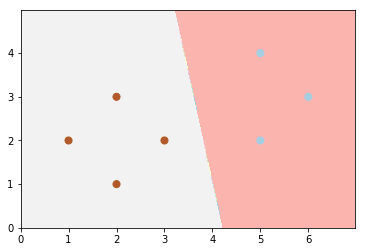

In [4]:
# Vaš kôd ovdje...

alpha = 0
ridge = RidgeClassifier(alpha)
ridge.fit(seven_X, seven_y)
h = ridge.predict(seven_X)
print "H(x) = ",h
print "Accuracy score: %.3f" % accuracy_score(seven_y, h)

mlutils.plot_2d_clf_problem(seven_X,seven_y,ridge.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]


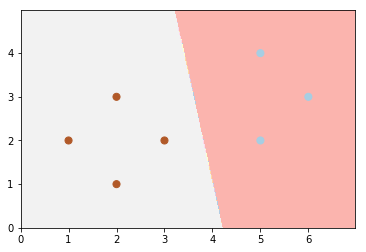

In [5]:
# Vaš kôd ovdje...
lin = LinearRegression()
lin.fit(seven_X, seven_y)
h = lin.predict(seven_X)
print h
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : lin.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

[ 0.35201401  0.96847636  1.06304729  0.25744308 -0.54816112  0.06830123
 -0.64273205 -1.51838879]


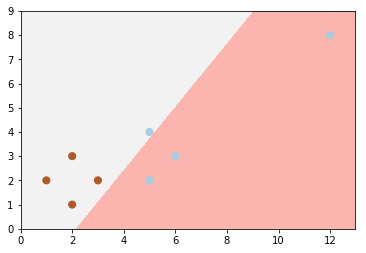

In [7]:
# Vaš kôd ovdje...
lin = LinearRegression()
lin.fit(outlier_X, outlier_y)
h = lin.predict(outlier_X)
print h
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : lin.predict(x) >= 0)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

[ 0.61616162  0.45454545  0.93939394  0.13131313 -0.67676768 -0.83838384
 -1.16161616  0.53535354]


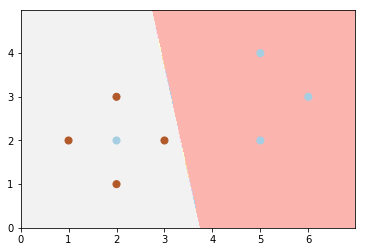

In [9]:
# Vaš kôd ovdje...
lin = LinearRegression()
lin.fit(unsep_X, unsep_y)
h = lin.predict(unsep_X)
print h
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, lambda x : lin.predict(x) >= 0)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

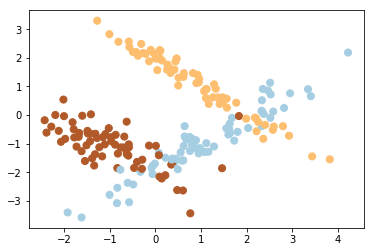

In [11]:
# Vaš kôd ovdje...
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

mlutils.plot_2d_clf_problem(X, y)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

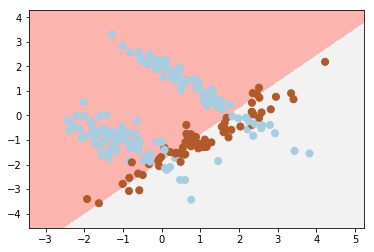

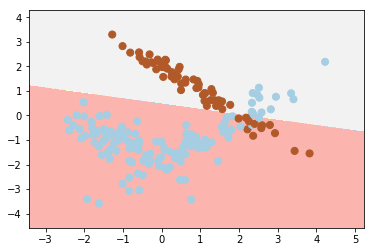

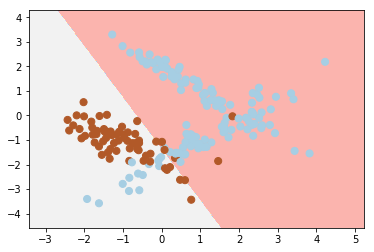

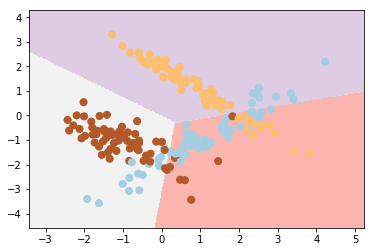

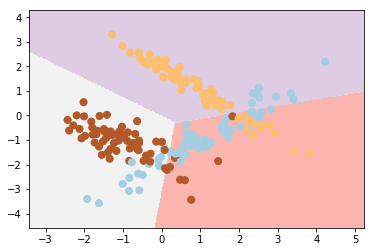

In [12]:
# Vaš kôd ovdje...
def argMaxh(X):
    X = X.reshape(1, -1)
    h = [lr0.predict(X), lr1.predict(X), lr2.predict(X)]
    return h.index(max(h))
 
   
 
def buildClassifier(y):
    lr = LinearRegression()
    lr.fit(X, y)
    mlutils.plot_2d_clf_problem(X,y, lambda x: lr.predict(x) >= 0.5)
    plt.show()
    return lr
 
y0 = list(map(lambda x: 1 if x == 0 else 0, y))
lr0 = buildClassifier(y0)

y1 = list(map(lambda x: 1 if x == 1 else 0, y))
lr1 = buildClassifier(y1)

y2 = list(map(lambda x: 1 if x == 2 else 0, y))
lr2 = buildClassifier(y2)

 
mlutils.plot_2d_clf_problem(X,y, lambda x: argMaxh(x))
plt.show()

ridge = RidgeClassifier(0)
ridge.fit(X,y)
mlutils.plot_2d_clf_problem(X,y, ridge.predict)
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [13]:
def sigm(x):
    # Vaš kôd ovdje...
    return 1 / (1 + sp.exp(-x))

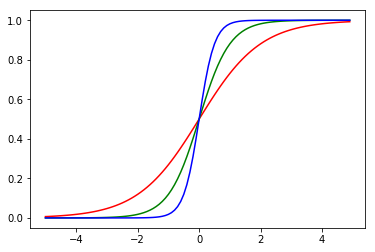

In [14]:
# Vaš kôd ovdje...
x = np.arange(-5., 5., 0.1)
sig1 = sigm(x)
sig2 = sigm(2*x)
sig4 = sigm(4*x)

plt.plot(x,sig1, 'r')

plt.plot(x,sig2, 'g')

plt.plot(x,sig4, 'b')
plt.show()

    

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [15]:
# Vaš kôd ovdje...

def sum(dw, delta):
    for i in range(len(dw)):
        dw[i] = dw[i]+delta[i]
    return dw

def sub(w, ndw):
    for i in range(len(w)):
        w[i] = w[i]-ndw[i]
    return w

def lr_h(x, w):
    return sigm(np.dot(x,w))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    w = np.array([0 for i in range(len(X[0])+1)])
    ws = []
    error=0
    for counter in range(max_iter):
        
        dw0 = 0
        dw = [0 for i in range(len(X[0])+1)]
        
        for i in range (0, len(X)):
            xi = np.insert(X[i],[0],[1])
            h = lr_h(xi, w)
            dw0 = dw0 + h - y[i]
            dw = sum(dw, np.multiply(h-y[i],xi))
        
        w[0] = w[0] - eta*dw0
        w = np.subtract(w*(1-eta*alpha), np.multiply(eta, dw))
        ws.append(w[:])
        
        err = cross_entropy_error(X,y,w)
        
        if(abs(error-err) < epsilon):
            if (trace):
                print "Stopped at step: ",counter
                return ws
            else:
                print "Stopped at step: ",counter
                return w
        else:
            error = err
        
    if (trace):
        return ws
    else:
        return w

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [16]:
# Vaš kôd ovdje...
def cross_entropy_error(X,y,w):
    h = []
    for i in range(len(X)):
        x= np.insert(X[i],[0],[1]) #inserting dummy 1
        h.append(lr_h(x,w))
    return sklearn.metrics.log_loss(y, h)

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

Stopped at step:  742
[ 5.53891655 -1.86915862  0.52171018]
0.0998070572821


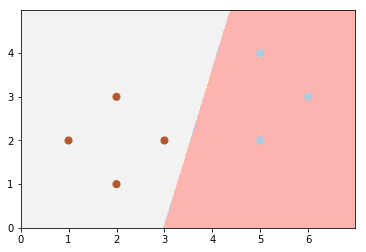

In [17]:
# Vaš kôd ovdje...
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w = lr_train(seven_X, seven_y)
print w

print cross_entropy_error(seven_X, seven_y, w)
 
mlutils.plot_2d_clf_problem(seven_X,seven_y, lambda x: int(round(lr_h(np.insert(x,[0],[1]),w))))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?


#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [18]:
from sklearn.metrics import zero_one_loss

Stopped at step:  742


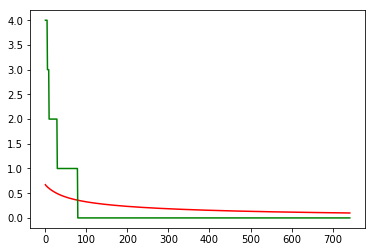

Stopped at step:  947
Stopped at step:  742
Stopped at step:  386
Stopped at step:  282


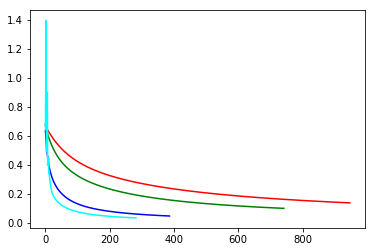

In [19]:
# Vaš kôd ovdje...
ws = lr_train(seven_X, seven_y, trace=True)
errors=[]
class_err=[]
for w in ws:
    h=[]
    errors.append(cross_entropy_error(seven_X, seven_y, w))
    for i in range(len(seven_X)):
        x= np.insert(seven_X[i],[0],[1]) #insert dummy 1
        hi = lr_h(x,w)
        if (hi<0.5):
            h.append(0)
        else:
            h.append(1)
    class_err.append(zero_one_loss(seven_y, h, normalize=False))
 
plt.plot(range(0,len(ws)), errors, 'r')
plt.plot(range(0,len(ws)), class_err, 'g')
plt.show()

colors = ['r','g','b',"cyan"]
i = 0
for n in [0.005, 0.01, 0.05, 0.1]:
    err = []
    ws = lr_train(seven_X, seven_y, eta=n, trace=True)
    for w in ws:
        err.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(0, len(ws)), err, color=colors[i])
    i += 1
    


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

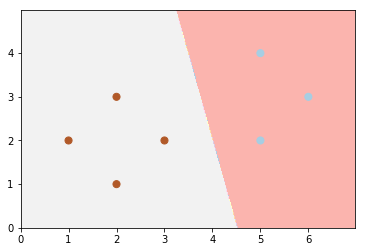

In [20]:
# Vaš kôd ovdje...
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=200, multi_class='ovr', solver='lbfgs')
logReg.fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, logReg.predict)


### 4. Analiza logističke regresije

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

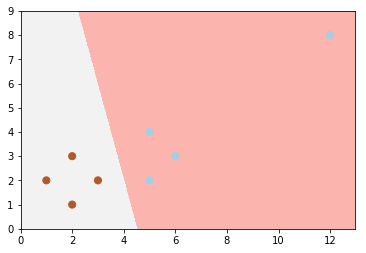

In [21]:
# Vaš kôd ovdje...
logReg = LogisticRegression(max_iter=200, multi_class='ovr', solver='lbfgs')
logReg.fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, logReg.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Stopped at step:  742


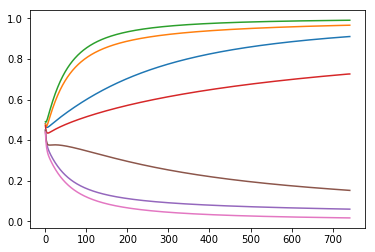

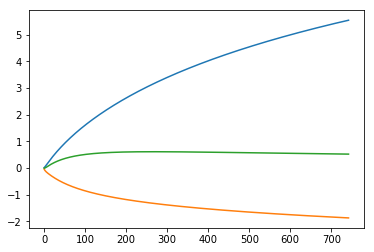

In [22]:
# Vaš kôd ovdje...
ws = lr_train(seven_X, seven_y, trace=True)
hs = [[] for i in range(len(seven_X))]

for w in ws:
    for i in range(len(seven_X)):
        x= np.insert(seven_X[i],[0],[1]) #inserting dummy 1
        hs[i].append(lr_h(x,w))
        
axis = range(len(hs[0])) 

for h in hs:
    plt.plot(axis, h)
plt.show()

axis = range(len(ws))

w0s = [w[0] for w in ws]
plt.plot(range(len(w0s)), w0s)

w1s = [w[1] for w in ws]
plt.plot(range(len(w1s)), w1s)

w2s = [w[2] for w in ws]
plt.plot(range(len(w2s)), w2s)

plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

Stopped at step:  338


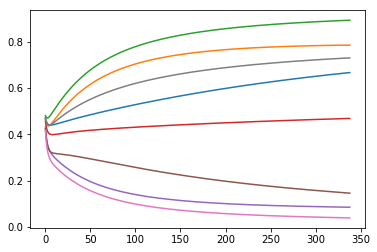

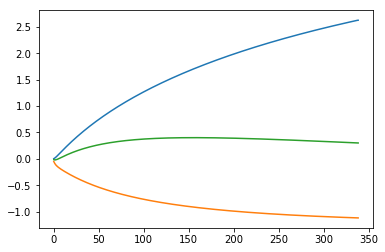

In [23]:
# Vaš kôd ovdje...
unsep_y = [1,1,1,1,0,0,0,0]
# Vaš kôd ovdje...
ws = lr_train(unsep_X, unsep_y, trace=True)
hs = [[] for i in range(len(unsep_X))]

for w in ws:
    for i in range(len(unsep_X)):
        x= np.insert(unsep_X[i],[0],[1]) #inserting dummy 1
        hs[i].append(lr_h(x,w))
        
axis = range(len(hs[0])) 

for h in hs:
    plt.plot(axis, h)
plt.show()

axis = range(len(ws))

w0s = [w[0] for w in ws]
plt.plot(range(len(w0s)), w0s)

w1s = [w[1] for w in ws]
plt.plot(range(len(w1s)), w1s)

w2s = [w[2] for w in ws]
plt.plot(range(len(w2s)), w2s)

plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

Stopped at step:  742
Stopped at step:  207
Stopped at step:  37
Stopped at step:  5


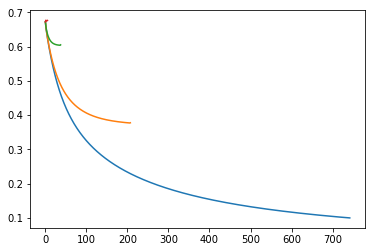

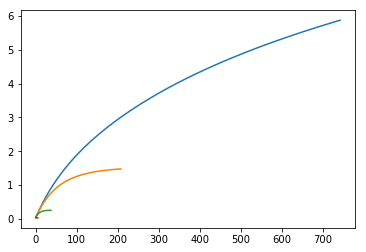

In [24]:
# Vaš kôd ovdje...
alphas = [0, 1, 10, 100]
errors=[[] for i in range(len(alphas))]
l2_norms = [[] for i in range(len(alphas))]
i=0
for alpha in alphas:
    ws = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    for w in ws:
        errors[i].append(cross_entropy_error(seven_X, seven_y, w))
        l2_norms[i].append(linalg.norm(w))
    i += 1
        
for error in errors:
    plt.plot(range(len(error)), error)

plt.show()

for l2_norm in l2_norms:
    plt.plot(range(len(l2_norm)), l2_norm)
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [25]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

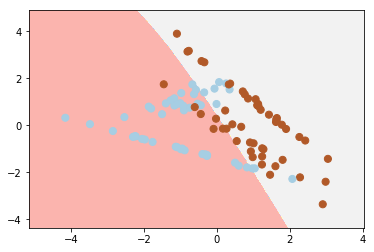

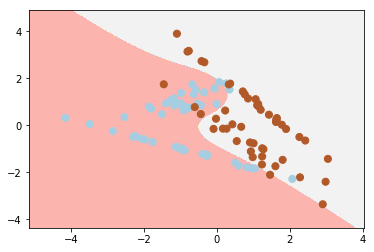

In [26]:
# Vaš kôd ovdje...
N = 100
ds = [2, 3]
X, y = make_classification(n_samples=N, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2)

for d in ds:
    poly = PolynomialFeatures(d)
    dm = poly.fit_transform(X)
    logReg = LogisticRegression(max_iter=200, multi_class='ovr', solver='lbfgs')
    logReg.fit(dm, y)
    mlutils.plot_2d_clf_problem(X, y, lambda x : logReg.predict(poly.transform(x)))
    plt.show()



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

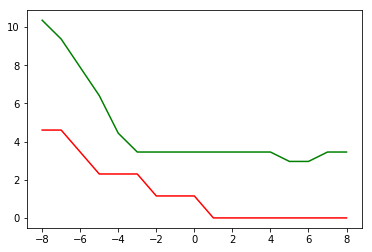

In [29]:
# Vaš kôd ovdje...
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.7)
d = 4
error_train=[]
error_test=[]
poly = PolynomialFeatures(d)
axis = range(-8,9,1)
dm_train = poly.fit_transform(X_train)
dm_test = poly.fit_transform(X_test)

for alpha in range(-8,9,1):
    
    logReg = LogisticRegression(max_iter=200, multi_class='ovr', solver='lbfgs', C=2**alpha)
    logReg.fit(dm_train, y_train)

    h_train = logReg.predict(dm_train)
    error_train.append(sklearn.metrics.log_loss(y_train, h_train))

    h_test = logReg.predict(dm_test)
    error_test.append(sklearn.metrics.log_loss(y_test, h_test))
    
plt.plot(axis, error_train, 'r')
plt.plot(axis, error_test, 'g')
plt.show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?